# Yasser Ashraf Mohammed 22010409

## First-Come, First-Served (FCFS) Scheduling

**(FCFS)** is a simple **non-preemptive** scheduling algorithm for CPU processes. In this algorithm, the process that **arrives first is executed first**.

## Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np


## Implementation And Result

In [3]:
from tabulate import tabulate

# Define the Process class to hold the process attributes
class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.completion_time = 0
        self.turnaround_time = 0
        self.waiting_time = 0

# Define the FCFS scheduling function
def fcfs_scheduling(processes):
    # Sort processes based on arrival time
    processes.sort(key=lambda x: x.arrival_time)
    current_time = 0
    
    for process in processes:
        # If the current time is less than the process arrival time, wait
        if current_time < process.arrival_time:
            current_time = process.arrival_time
        # Completion time is current time + burst time
        process.completion_time = current_time + process.burst_time
        # Turnaround time = Completion time - Arrival time
        process.turnaround_time = process.completion_time - process.arrival_time
        # Waiting time = Turnaround time - Burst time
        process.waiting_time = process.turnaround_time - process.burst_time
        # Update current time to the completion time of the current process
        current_time = process.completion_time

    return processes

# Example processes (Name, Arrival Time, Burst Time)
processes = [
    Process("P1", 0, 4),
    Process("P2", 1, 3),
    Process("P3", 2, 1),
    Process("P4", 3, 2)
]

# Call FCFS scheduling
scheduled_processes = fcfs_scheduling(processes)

# Prepare data for tabulate
table_data = []
for process in scheduled_processes:
    table_data.append([
        process.name, 
        process.arrival_time, 
        process.burst_time, 
        process.completion_time, 
        process.turnaround_time, 
        process.waiting_time
    ])

# Define the table headers
headers = ["Process", "Arrival Time", "Burst Time", "Completion Time", "Turnaround Time", "Waiting Time"]

# Print the result as a beautiful table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+-----------+----------------+--------------+-------------------+-------------------+----------------+
| Process   |   Arrival Time |   Burst Time |   Completion Time |   Turnaround Time |   Waiting Time |
+===========+================+==============+===================+===================+================+
| P1        |              0 |            4 |                 4 |                 4 |              0 |
+-----------+----------------+--------------+-------------------+-------------------+----------------+
| P2        |              1 |            3 |                 7 |                 6 |              3 |
+-----------+----------------+--------------+-------------------+-------------------+----------------+
| P3        |              2 |            1 |                 8 |                 6 |              5 |
+-----------+----------------+--------------+-------------------+-------------------+----------------+
| P4        |              3 |            2 |                10 |        

### Explanation

In the above code:
- We created a `Process` class to store the **arrival** time, **burst** time, **completion** time, **turnaround** time, and **waiting** time for each process.
- The `fcfs_scheduling` function **sorts processes by their arrival time** and then calculates the completion time, turnaround time, and waiting time for each process.

## Visulaizations

### 1. Gantt Chart

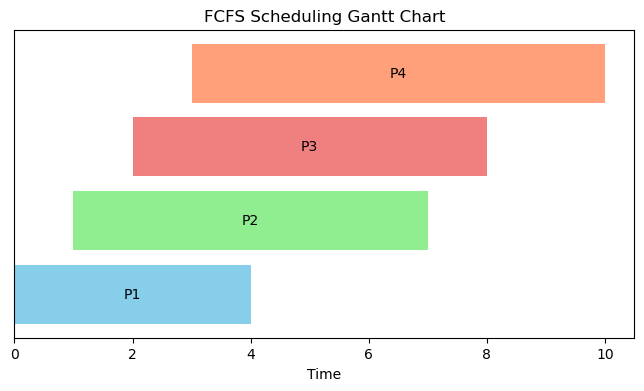

In [13]:
def plot_gantt_chart(processes):
    start_times = [process.arrival_time for process in processes]  # List of arrival times
    end_times = [0] * len(processes)  # Placeholder for end times

    current_time = 0
    for i, process in enumerate(processes):
        # If the current time is less than the process arrival time, wait
        if current_time < process.arrival_time:
            current_time = process.arrival_time
        # Update the end time of the process
        end_times[i] = current_time + process.burst_time
        current_time = end_times[i]  # Move the current time forward
    
    # Assign distinct colors for each process
    colors = ["skyblue", "lightgreen", "lightcoral", "lightsalmon"]

    # Plot Gantt chart
    fig, ax = plt.subplots(figsize=(8, 4))
    for i, process in enumerate(processes):
        ax.barh([i], end_times[i] - start_times[i], left=start_times[i], color=colors[i % len(colors)])  # Cycle through colors
    
    # Add process names to the Gantt chart
    for i, process in enumerate(processes):
        ax.text((start_times[i] + end_times[i]) / 2, i, process.name, ha='center', va='center', color="black")

    ax.set_xlabel("Time")
    ax.set_yticks([])  # Hide the y-axis
    ax.set_title("FCFS Scheduling Gantt Chart")
    plt.show()

# Plot the Gantt chart for the FCFS scheduling
plot_gantt_chart(scheduled_processes)

* The **Gantt chart** above visually represents **how processes are scheduled** in FCFS. The processes are **executed in the order of their arrival times**, and each process's execution time is represented by the horizontal bars.

### 2. Bar Plot

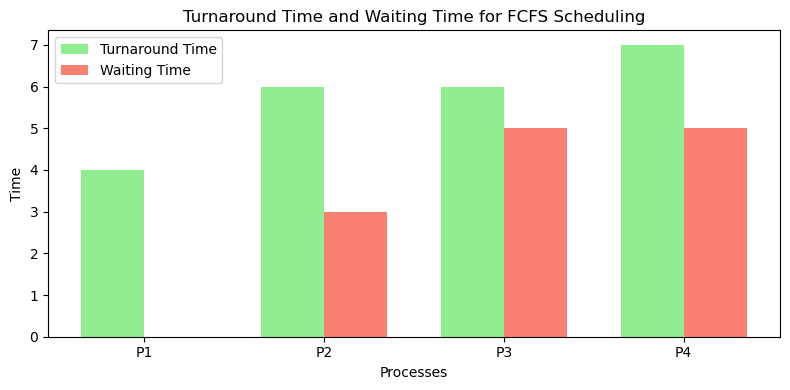

In [11]:
# Plot Turnaround Time and Waiting Time for each process
def plot_times(processes):
    names = [process.name for process in processes]
    turnaround_times = [process.turnaround_time for process in processes]
    waiting_times = [process.waiting_time for process in processes]

    # Create a bar plot for Turnaround Time and Waiting Time
    fig, ax = plt.subplots(figsize=(8, 4))
    bar_width = 0.35
    index = np.arange(len(processes))

    bar1 = ax.bar(index, turnaround_times, bar_width, label='Turnaround Time', color='lightgreen')
    bar2 = ax.bar(index + bar_width, waiting_times, bar_width, label='Waiting Time', color='salmon')

    ax.set_xlabel('Processes')
    ax.set_ylabel('Time')
    ax.set_title('Turnaround Time and Waiting Time for FCFS Scheduling')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(names)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot Turnaround and Waiting Times
plot_times(scheduled_processes)


## Key insights:
- FCFS is a **non-preemptive scheduling algorithm** where processes are executed in the order of their arrival times.
- It is simple but can suffer from the **convoy effect**, where shorter processes can be delayed by longer ones.
- The method works well for small systems but may not be ideal for real-time applications with time-sensitive tasks.

By analyzing these results, we can conclude that while FCFS is straightforward and easy to implement, its **effectiveness** is heavily dependent on the **arrival times** and **burst times** of the processes.

## GUI APP

In [58]:
import sys
from tkinter import Tk, Label, Entry, Button, END, messagebox, ttk

# Class to store process information
class Process:
    def __init__(self, id=0, at=0, bt=0):
        self.id = id  # Process ID
        self.at = at  # Arrival Time
        self.bt = bt  # Burst Time
        self.ct = 0   # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0   # Waiting Time
        self.rt = 0   # Response Time

# Global process queue for adding processes
process_queue = []

# GUI Application Functions
def calculate():
    global process_queue
    if not process_queue:
        messagebox.showerror("Input Error", "No processes to calculate!")
        return

    # Sort processes based on arrival time and ID
    process_queue.sort(key=lambda x: (x.at, x.id))
    n = len(process_queue)
    ar = [None] * (n + 1)
    for i, process in enumerate(process_queue, 1):
        ar[i] = process

    # Execute the FCFS scheduling algorithm
    execute(n, ar)

    # Clear the table and display results
    process_table.delete(*process_table.get_children())
    total_wt = total_tat = total_rt = 0

    for i in range(1, n + 1):
        p = ar[i]
        total_wt += p.wt
        total_tat += p.tat
        total_rt += p.rt
        process_table.insert('', END, values=(p.id, p.at, p.bt, p.ct, p.tat, p.wt, p.rt))

    # Display averages
    summary_label.config(
        text=f"Average waiting time is: {total_wt / n:.2f}, Average turnaround time is: {total_tat / n:.2f}, Average response time is: {total_rt / n:.2f}"
    )

def add_process(event=None):  # Allow event parameter for Enter key binding
    global process_queue

    try:
        at = int(at_entry.get())
        bt = int(bt_entry.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers for Arrival Time and Burst Time.")
        return

    # Auto-generate Process ID
    pid = len(process_queue) + 1

    # Add process to the queue
    process_queue.append(Process(pid, at, bt))
    process_table.insert('', END, values=(pid, at, bt, "-", "-", "-", "-"))
    at_entry.delete(0, END)
    bt_entry.delete(0, END)
    at_entry.focus()  # Reset focus to Arrival Time for the next input

def reset(event=None):  # Allow event parameter for Delete key binding
    global process_queue
    process_table.delete(*process_table.get_children())
    summary_label.config(text="")
    process_queue = []  # Reset the process queue

def delete_last_process(event=None):  # Allow event parameter for Backspace key binding
    global process_queue
    selected_item = process_table.selection()
    if selected_item:
        index = process_table.index(selected_item)
        process_table.delete(selected_item)
        process_queue.pop(index)
    else:
        children = process_table.get_children()
        if children:
            process_table.delete(children[-1])
            process_queue.pop()

# Main scheduling logic (FCFS)
def execute(n, ar):
    current_time = 0
    for i in range(1, n + 1):
        if current_time < ar[i].at:
            current_time = ar[i].at  # Wait for the process to arrive
        current_time += ar[i].bt
        ar[i].ct = current_time
        ar[i].tat = ar[i].ct - ar[i].at
        ar[i].wt = ar[i].tat - ar[i].bt
        ar[i].rt = ar[i].wt  # Response Time is Waiting Time in non-preemptive FCFS

# Main GUI window
root = Tk()
root.title("FCFS Scheduler")

# Input fields
Label(root, text="Arrival Time").grid(row=0, column=0, padx=5, pady=5)
Label(root, text="Burst Time").grid(row=0, column=1, padx=5, pady=5)

at_entry = Entry(root, width=10)
at_entry.grid(row=1, column=0, padx =5, pady=5)
bt_entry = Entry(root, width=10)
bt_entry.grid(row=1, column=1, padx=5, pady=5)

# Bind Enter keys for navigation and addition
at_entry.bind("<Return>", lambda e: bt_entry.focus())
bt_entry.bind("<Return>", add_process)  # Add process when Enter is pressed after BT

Button(root, text="Add Process", command=add_process).grid(row=1, column=2, padx=5, pady=5)

# Process table
columns = ("pid", "Arrival Time", "Burst Time", "Completion Time", "Turnaround Time", "Waiting Time", "Response Time")
process_table = ttk.Treeview(root, columns=columns, show="headings", height=10)
process_table.grid(row=2, column=0, columnspan=3, padx=10, pady=10)

for col in columns:
    process_table.heading(col, text=col.upper())

# Summary and buttons
Button(root, text="Calculate", command=calculate).grid(row=3, column=0, padx=5, pady=5)
Button(root, text="Reset", command=reset).grid(row=3, column=1, padx=5, pady=5)

summary_label = Label(root, text="", fg="blue")
summary_label.grid(row=3, column=2)

# Initialize focus
at_entry.focus()

# Bind global keys
root.bind("<BackSpace>", delete_last_process)
root.bind("<Delete>", reset)

root.mainloop()

# Wael Ahmed 22010290

## Non_Preemptive SJF

In [14]:
import sys
from functools import cmp_to_key
from tkinter import Tk, Label, Entry, Button, Text, END, messagebox, ttk

# Class to store process information
class Process:
    def __init__(self, id=0, at=0, bt=0):
        self.id = id  # Process ID
        self.at = at  # Arrival Time
        self.bt = bt  # Burst Time
        self.ct = 0   # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0   # Waiting Time
        self.rt = 0   # Response Time

# Global process queue for adding processes
process_queue = []

# GUI Application Functions
def calculate():
    global process_queue
    if not process_queue:
        messagebox.showerror("Input Error", "No processes to calculate!")
        return

    # Sort processes based on arrival time and ID
    process_queue.sort(key=lambda x: (x.at, x.id))
    n = len(process_queue)
    ar = [None] * (n + 1)
    for i, process in enumerate(process_queue, 1):
        ar[i] = process

    # Execute the SJF scheduling algorithm
    execute(n, ar)

    # Clear the table and display results
    process_table.delete(*process_table.get_children())
    total_wt = total_tat = total_rt = 0

    for i in range(1, n + 1):
        p = ar[i]
        total_wt += p.wt
        total_tat += p.tat
        total_rt += p.rt
        process_table.insert('', END, values=(p.id, p.at, p.bt, p.ct, p.tat, p.wt, p.rt))

    # Display averages
    summary_label.config(
        text=f"Average waiting time is: {total_wt / n:.2f}, Average turnaround time is: {total_tat / n:.2f}, Average response time is: {total_rt / n:.2f}"
    )

def add_process(event=None):  # Allow event parameter for Enter key binding
    global process_queue

    try:
        at = int(at_entry.get())
        bt = int(bt_entry.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers for Arrival Time and Burst Time.")
        return

    # Auto-generate Process ID
    pid = len(process_queue) + 1

    # Add process to the queue
    process_queue.append(Process(pid, at, bt))
    process_table.insert('', END, values=(pid, at, bt, "-", "-", "-", "-"))
    at_entry.delete(0, END)
    bt_entry.delete(0, END)
    at_entry.focus()  # Reset focus to Arrival Time for the next input

def reset(event=None):  # Allow event parameter for Delete key binding
    global process_queue
    process_table.delete(*process_table.get_children())
    summary_label.config(text="")
    process_queue = []  # Reset the process queue

def delete_last_process(event=None):  # Allow event parameter for Backspace key binding
    global process_queue
    selected_item = process_table.selection()
    if selected_item:
        index = process_table.index(selected_item)
        process_table.delete(selected_item)
        process_queue.pop(index)
    else:
        children = process_table.get_children()
        if children:
            process_table.delete(children[-1])
            process_queue.pop()

# Main scheduling logic (Non-Preemptive SJF)
def execute(n, ar):
    current_time = 0
    completed = 0
    visited = [False] * (n + 1)

    while completed != n:
        # Find the process with the shortest burst time from available processes
        idx = -1
        min_bt = float('inf')

        for i in range(1, n + 1):
            if ar[i].at <= current_time and not visited[i]:
                if ar[i].bt < min_bt:
                    min_bt = ar[i].bt
                    idx = i
                elif ar[i].bt == min_bt:  # Tie-breaking by process ID
                    if ar[i].id < ar[idx].id:
                        idx = i

        if idx != -1:
            # Process the selected task
            visited[idx] = True
            current_time += ar[idx].bt
            ar[idx].ct = current_time
            ar[idx].tat = ar[idx].ct - ar[idx].at
            ar[idx].wt = ar[idx].tat - ar[idx].bt
            ar[idx].rt = ar[idx].wt  # Response Time is Waiting Time in non-preemptive SJF
            completed += 1
        else:
            # If no process is available, increment time
            current_time += 1

# Main GUI window
root = Tk()
root.title("Non-Preemptive SJF Scheduler (Queue)")

# Input fields
Label(root, text="Arrival Time").grid(row=0, column=0, padx=5, pady=5)
Label(root, text="Burst Time").grid(row=0, column=1, padx=5, pady=5)

at_entry = Entry(root, width=10)
at_entry.grid(row=1, column=0, padx=5, pady=5)
bt_entry = Entry(root, width=10)
bt_entry.grid(row=1, column=1, padx=5, pady=5)

# Bind Enter keys for navigation and addition
at_entry.bind("<Return>", lambda e: bt_entry.focus())
bt_entry.bind("<Return>", add_process)  # Add process when Enter is pressed after BT

Button(root, text="Add Process", command=add_process).grid(row=1, column=2, padx=5, pady=5)

# Process table
columns = ("pid", "Arrival Time", "Burst Time", "Completion Time", "turnaround time", "waiting time", "response time")
process_table = ttk.Treeview(root, columns=columns, show="headings", height=10)
process_table.grid(row=2, column=0, columnspan=3, padx=10, pady=10)

for col in columns:
    process_table.heading(col, text=col.upper())

# Summary and buttons
Button(root, text="Calculate", command=calculate).grid(row=3, column=0, padx=5, pady=5)
Button(root, text="Reset", command=reset).grid(row=3, column=1, padx=5, pady=5)

summary_label = Label(root, text="", fg="blue")
summary_label.grid(row=3, column=2)

# Initialize focus
at_entry.focus()

# Bind global keys
root.bind("<BackSpace>", delete_last_process)
root.bind("<Delete>", reset)
root.bind("<Shift-Return>", lambda e: calculate())  # Shift+Enter for Calculate

root.mainloop()

# Ahmed Husein 20225926030

## Preemtive SJF

In [16]:
import tkinter as tk
from tkinter import messagebox, ttk

In [17]:
def srtf(process_list):
    gantt = []
    burst_times = {p[2]: p[0] for p in process_list}  # Store original burst times
    first_execution = {}  # Track the first execution time of each process
    remaining_time = {p[2]: p[0] for p in process_list}  # Remaining burst time
    completion = {}
    waiting_time = {p[2]: 0 for p in process_list}  # Track total waiting time
    t = 0  # Current time
    last_active = None  # Tracks the last active process

    while remaining_time:
        # Get all processes that have arrived and are not completed
        available = [p for p in process_list if p[1] <= t and p[2] in remaining_time]

        if not available:
            # If no processes are available, CPU is idle
            gantt.append("Idle")
            t += 1
            continue

        # Select the process with the shortest remaining time
        available.sort(key=lambda p: (remaining_time[p[2]], p[1]))
        current_process = available[0][2]  # Process ID of the selected process

        if current_process != last_active:
            gantt.append(current_process)
            last_active = current_process

        # Record first execution time if not already done
        if current_process not in first_execution:
            first_execution[current_process] = t  # Record when the process starts for the first time

        # Execute the process for 1 unit of time
        remaining_time[current_process] -= 1
        t += 1

        # Increment waiting time for all other ready processes
        for p in available:
            if p[2] != current_process:
                waiting_time[p[2]] += 1

        # If the process is complete, record its metrics
        if remaining_time[current_process] == 0:
            ct = t  # Completion time
            at = next(p[1] for p in process_list if p[2] == current_process)  # Arrival time
            bt = burst_times[current_process]  # Original burst time
            tat = ct - at  # Turnaround time
            wt = tat - bt  # Waiting time
            completion[current_process] = [ct, tat, wt]
            del remaining_time[current_process]

    return gantt, completion, first_execution


In [19]:
def add_process():
    try:
        burst_time = int(entry_burst_time.get())
        arrival_time = int(entry_arrival_time.get())
        pid = entry_pid.get()
        if not pid:
            raise ValueError("Process ID cannot be empty!")
        processes.append([burst_time, arrival_time, pid])
        tree.insert("", "end", values=(pid, burst_time, arrival_time))
        entry_burst_time.delete(0, tk.END)
        entry_arrival_time.delete(0, tk.END)
        entry_pid.delete(0, tk.END)
    except ValueError as e:
        messagebox.showerror("Invalid Input", str(e))

In [20]:
def run_simulation():
    if not processes:
        messagebox.showerror("Error", "No processes to simulate!")
        return

    process_list = [p[:] for p in processes]  # Copy the list to avoid modifying the original
    gantt, completion, first_execution = srtf(process_list)
    
    # Calculating averages
    total_wt = total_tat = total_response = 0
    num_processes = len(completion)
    for pid, metrics in completion.items():
        total_wt += metrics[2]  # Waiting Time (WT)
        total_tat += metrics[1]  # Turnaround Time (TAT)
        response_time = first_execution[pid] - processes[[p[2] for p in processes].index(pid)][1]
        total_response += response_time
    
    avg_wt = total_wt / num_processes
    avg_tat = total_tat / num_processes
    avg_response = total_response / num_processes

    # Display results in the GUI
    gantt_chart.set(" -> ".join(gantt))
    output_text.delete("1.0", tk.END)
    output_text.insert(tk.END, "PID\tCT\tTAT\tWT\tRT\n")
    for pid, metrics in completion.items():
        response_time = first_execution[pid] - processes[[p[2] for p in processes].index(pid)][1]
        output_text.insert(tk.END, f"{pid}\t{metrics[0]}\t{metrics[1]}\t{metrics[2]}\t{response_time}\n")
    
    # Display averages
    output_text.insert(tk.END, "\n")
    output_text.insert(tk.END, f"Average Waiting Time: {avg_wt:.2f}\n")
    output_text.insert(tk.END, f"Average Turnaround Time: {avg_tat:.2f}\n")
    output_text.insert(tk.END, f"Average Response Time: {avg_response:.2f}\n")


In [21]:
# Initialize the GUI
root = tk.Tk()
root.title("SRTF Scheduling Simulation")

# Input Section
frame_input = tk.Frame(root)
frame_input.pack(pady=10)

tk.Label(frame_input, text="Burst Time:").grid(row=0, column=0, padx=5, pady=5)
entry_burst_time = tk.Entry(frame_input)
entry_burst_time.grid(row=0, column=1, padx=5, pady=5)

tk.Label(frame_input, text="Arrival Time:").grid(row=1, column=0, padx=5, pady=5)
entry_arrival_time = tk.Entry(frame_input)
entry_arrival_time.grid(row=1, column=1, padx=5, pady=5)

tk.Label(frame_input, text="Process ID:").grid(row=2, column=0, padx=5, pady=5)
entry_pid = tk.Entry(frame_input)
entry_pid.grid(row=2, column=1, padx=5, pady=5)

btn_add_process = tk.Button(frame_input, text="Add Process", command=add_process)
btn_add_process.grid(row=3, columnspan=2, pady=10)



In [22]:
# Process List Display
frame_process_list = tk.Frame(root)
frame_process_list.pack(pady=10)

tree = ttk.Treeview(frame_process_list, columns=("PID", "Burst Time", "Arrival Time"), show="headings")
tree.heading("PID", text="Process ID")
tree.heading("Burst Time", text="Burst Time")
tree.heading("Arrival Time", text="Arrival Time")
tree.pack()

# Simulation Button
btn_simulate = tk.Button(root, text="Run Simulation", command=run_simulation)
btn_simulate.pack(pady=10)

# Output Section
frame_output = tk.Frame(root)
frame_output.pack(pady=10)

tk.Label(frame_output, text="Gantt Chart:").pack()
gantt_chart = tk.StringVar()
tk.Label(frame_output, textvariable=gantt_chart, wraplength=600).pack(pady=5)

output_text = tk.Text(frame_output, height=10, width=50)
output_text.pack()

# Initialize process list
processes = []

root.mainloop()


# Abdurhman Hesham 22010136
# Moamen Ahmed 22010136

## Round Ropin

In [23]:
def round_robin(processes, burst_times, time_quantum):
    """
    Simulates Round Robin CPU scheduling.

    :param processes: List of process IDs.
    :param burst_times: List of burst times for each process.
    :param time_quantum: Time quantum for Round Robin scheduling.
    :return: Dictionary containing average waiting time, average turnaround time, and average response time.
    """
    n = len(processes)
    remaining_burst_times = burst_times[:]
    waiting_time = [0] * n
    turnaround_time = [0] * n
    response_time = [-1] * n  # -1 indicates response time has not been set yet

    time = 0  # Current time
    queue = []  # Queue to manage process execution order

    # Initialize the queue with process indices
    for i in range(n):
        queue.append(i)

    while queue:
        process_index = queue.pop(0)
        
        """This condition ensures response time is recorded only the first timea process is executed.
        You could elaborate on this in the comment to help readers
        understand its significance"""
        
        # Record the response time if it's the first time the process is executed
        if response_time[process_index] == -1:
            response_time[process_index] = time

        # Execute the process for at most 'time_quantum'
        if remaining_burst_times[process_index] > time_quantum:
            time += time_quantum
            
            """This line reduces the remaining burst time by the time quantum.
            Consider noting how this ensures fairness in CPU allocation."""
            
            remaining_burst_times[process_index] -= time_quantum
            queue.append(process_index)  # Add process back to the queue
        else:
            time += remaining_burst_times[process_index]
            remaining_burst_times[process_index] = 0
            
            """Turnaround time is set once the process finishes execution.
            Mention how this integrates with the overall metric calculations."""
            
            turnaround_time[process_index] = time

    # Calculate waiting time
    """This formula calculates the waiting time for each process.
    It may help to briefly explain how this subtraction accounts for total CPU idle time per process."""
    for i in range(n):
        waiting_time[i] = turnaround_time[i] - burst_times[i]

    # Calculate averages
    """The average waiting time is calculated. You might want to include a comment on how this metric helps evaluate scheduler efficiency."""
    avg_waiting_time = sum(waiting_time) / n
    avg_turnaround_time = sum(turnaround_time) / n
    avg_response_time = sum(response_time) / n

    return {
        "Average Waiting Time": avg_waiting_time,
        "Average Turnaround Time": avg_turnaround_time,
        "Average Response Time": avg_response_time,
    }


In [24]:
# Example usage
"""This example input demonstrates the algorithm. Consider describing how changing these inputs affects the results.

"""
if __name__ == "__main__":
    processes = ["P1", "P2", "P3", "P4"]
    burst_times = [10, 5, 8, 6]
    time_quantum = 3

    result = round_robin(processes, burst_times, time_quantum)

    print("Round Robin Scheduling Results:")
    print(f"Average Waiting Time: {result['Average Waiting Time']:.2f}")
    print(f"Average Turnaround Time: {result['Average Turnaround Time']:.2f}")
    print(f"Average Response Time: {result['Average Response Time']:.2f}")


Round Robin Scheduling Results:
Average Waiting Time: 17.00
Average Turnaround Time: 24.25
Average Response Time: 4.50


# Hamza Hussein 22011501
# Moaz Moustafa 22010263

## Priority Algorithm

## Import

In [27]:
import heapq #heap property ensures that the smallest element is always at the top
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Process Class For Making Creating Process Easiers

In [42]:
class Process:
    
    def __init__(self, pid, arrival_time, burst_time, priority):
        
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.remaining_time = burst_time
        self.completion_time = 0
        self.waiting_time = 0
        self.turnaround_time = 0
        self.response_time = -1

## Non-Preemptive Priority Scheduling Algorithm

In [43]:
def non_preemptive_priority_scheduling(processes):
    
    processes.sort(key=lambda x: (x.arrival_time, x.priority))
    current_time = 0
    gantt_chart = []

    for process in processes:
        
        if current_time < process.arrival_time:
            current_time = process.arrival_time  
        
        process.waiting_time = current_time - process.arrival_time
        process.response_time = process.waiting_time  # since it is non-preemptive
        process.turnaround_time = process.waiting_time + process.burst_time

        gantt_chart.append((process.pid, current_time, current_time + process.burst_time))
        current_time += process.burst_time  

    return processes, gantt_chart


## Preemptive Priority Scheduling Algorithm

In [44]:
def preemptive_priority_scheduling(processes):
    
    current_time = 0
    completed = 0
    n = len(processes)
    ready_queue = []
    heapq.heapify(ready_queue)
    
    processes.sort(key=lambda x: x.arrival_time)
    gantt_chart = []
    i = 0
    
    while completed != n:
        
        # this code is just to fill the queue with the already arrived processes
        # and through this iteration it will process and choose the highest priority to apply 
        # and in the 2nd iteration it will update the ready queue
        while i < n and processes[i].arrival_time <= current_time:
            
            heapq.heappush(ready_queue, (processes[i].priority, i))
            i += 1
        
        # check if ready queue is not empty
        if ready_queue:
            
            _, idx = heapq.heappop(ready_queue)
            process = processes[idx]
            
            # if this is the first time we execute this process
            if process.response_time == -1:
                process.response_time = current_time - process.arrival_time

            process.remaining_time -= 1
            gantt_chart.append((process.pid, current_time, current_time + 1))
            current_time += 1
            
            # if the process finally finishes we will calc the variables
            if process.remaining_time == 0:
                
                process.completion_time = current_time
                process.turnaround_time = process.completion_time - process.arrival_time
                process.waiting_time = process.turnaround_time - process.burst_time
                completed += 1
            
            # if the process didn't finish we will push it again to the ready queue and make it order by the priority
            else:
                heapq.heappush(ready_queue, (process.priority, idx))
        else:
            current_time += 1

    return processes, gantt_chart

## Chant Chart Function

In [46]:
def plot_gantt_chart(gantt_chart, title, color='skyblue'):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the Gantt chart
    for pid, start, end in gantt_chart:
        ax.barh(pid, end - start, left=start, color=color)
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Process ID')
    ax.set_title(title)
    
    # Get unique start and end times
    unique_times = sorted(set([start for _, start, _ in gantt_chart] + [end for _, _, end in gantt_chart]))
    
    # Set x-axis ticks to unique start and end times
    ax.set_xticks(unique_times)
    ax.set_xticklabels(unique_times)
    
    # Add gridlines only at the start and end times
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.show()


## Function for Printing The Results

In [47]:
def print_results(processes, scheduling_type):
    
    print(f"\n{scheduling_type} Priority Scheduling Results:\n")
    print("PID\tArrival\tBurst\tPriority\tWaiting\tTurnaround\tResponse")
    
    for p in processes:
        
        print(f"{p.pid}\t{p.arrival_time}\t{p.burst_time}\t{p.priority}\t\t{p.waiting_time}\t{p.turnaround_time}\t\t{p.response_time}")
    
    avg_waiting = sum(p.waiting_time for p in processes) / len(processes)
    avg_turnaround = sum(p.turnaround_time for p in processes) / len(processes)
    avg_response = sum(p.response_time for p in processes) / len(processes)
    
    print(f"\nAverage Waiting Time: {avg_waiting:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround:.2f}")
    print(f"Average Response Time: {avg_response:.2f}")

# The Processes We Gonna Apply On

In [48]:
process_data = [
        {"pid": "P1", "arrival_time": 0, "burst_time": 10, "priority": 3},
        {"pid": "P2", "arrival_time": 0, "burst_time": 1, "priority": 1},
        {"pid": "P3", "arrival_time": 0, "burst_time": 2, "priority": 4},
        {"pid": "P4", "arrival_time": 0, "burst_time": 1, "priority": 5},
        {"pid": "P5", "arrival_time": 0, "burst_time": 5, "priority": 2}
    ]

processes = [Process(**p) for p in process_data]

## Example for Non-Preemptive Priority Scheduling Algorithm


Non-Preemptive Priority Scheduling Results:

PID	Arrival	Burst	Priority	Waiting	Turnaround	Response
P2	0	1	1		0	1		0
P5	0	5	2		1	6		1
P1	0	10	3		6	16		6
P3	0	2	4		16	18		16
P4	0	1	5		18	19		18

Average Waiting Time: 8.20
Average Turnaround Time: 12.00
Average Response Time: 8.20


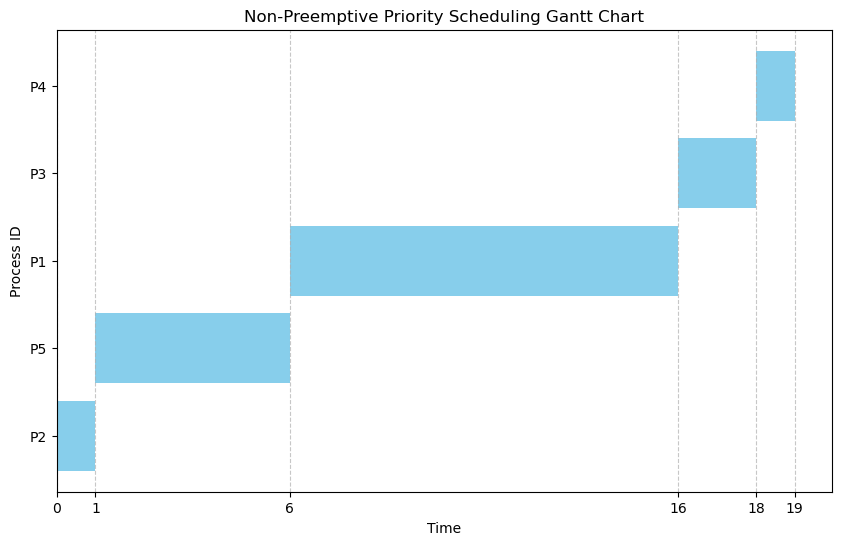

In [49]:
non_preemptive_result, gantt_non_preemptive = non_preemptive_priority_scheduling(processes)
print_results(non_preemptive_result, "Non-Preemptive")
plot_gantt_chart(gantt_non_preemptive, "Non-Preemptive Priority Scheduling Gantt Chart")

## Example for Preemptive Priority Scheduling Algorithm


Preemptive Priority Scheduling Results:

PID	Arrival	Burst	Priority	Waiting	Turnaround	Response
P1	0	10	3		6	16		0
P2	1	1	1		0	1		0
P3	2	2	4		14	16		14
P4	3	1	5		15	16		15
P5	4	5	2		0	5		0

Average Waiting Time: 7.00
Average Turnaround Time: 10.80
Average Response Time: 5.80


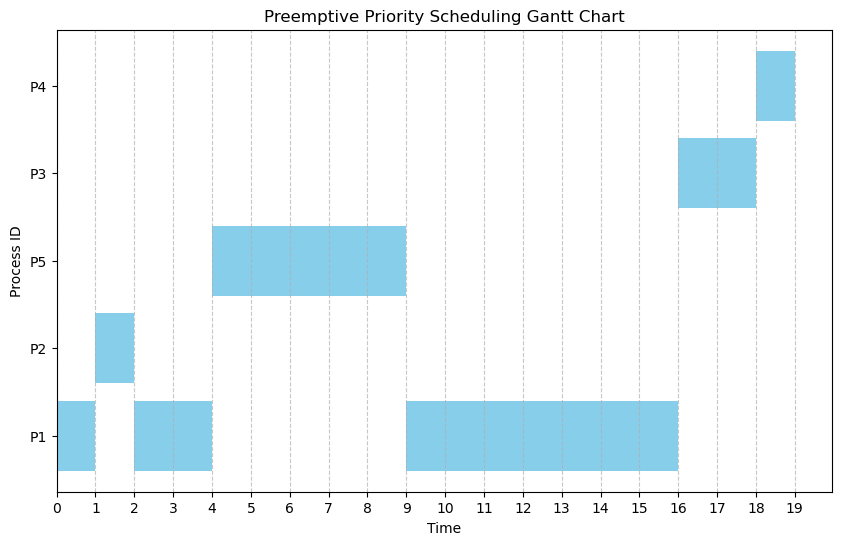

In [51]:
process_data = [
        {"pid": "P1", "arrival_time": 0, "burst_time": 10, "priority": 3},
        {"pid": "P2", "arrival_time": 1, "burst_time": 1, "priority": 1},
        {"pid": "P3", "arrival_time": 2, "burst_time": 2, "priority": 4},
        {"pid": "P4", "arrival_time": 3, "burst_time": 1, "priority": 5},
        {"pid": "P5", "arrival_time": 4, "burst_time": 5, "priority": 2}
    ]

processes = [Process(**p) for p in process_data] # reset the processes

preemptive_result, gantt_preemptive = preemptive_priority_scheduling(processes)
print_results(preemptive_result, "Preemptive")
plot_gantt_chart(gantt_preemptive, "Preemptive Priority Scheduling Gantt Chart")